# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [2]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d
 

In [3]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
    
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
    
    
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            # ??
            d = euclidianDistance(prev_centroid,cur_centroid)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    
                    # Lấy c là vị trí có min trong d_list
                    c = d_list.index(min(d_list))
                    
                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                tu =0
                mau = 0
                for i in samples:
                    tu += i[0]
                    mau += i[1]
                new_centroid = []
                new_centroid.append(tu/(len(samples)))
                new_centroid.append(mau/(len(samples)))
                # new centroid = mean of samples[]
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))

                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            
            pred.append( d_list.index(min(d_list)))
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [4]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

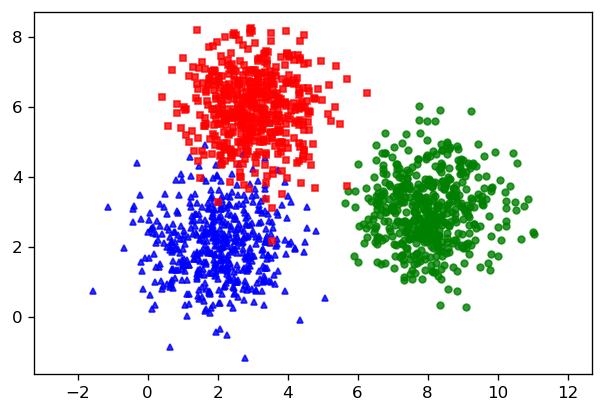

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


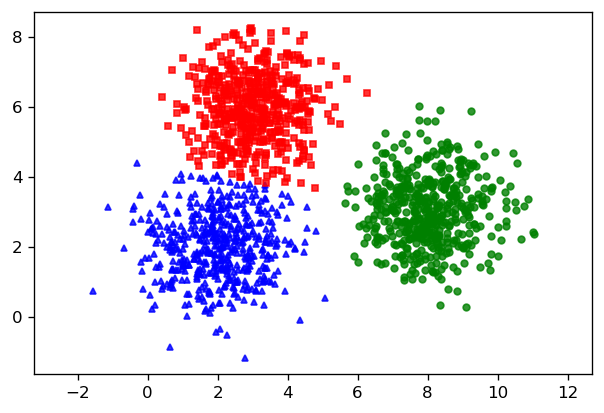

In [6]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


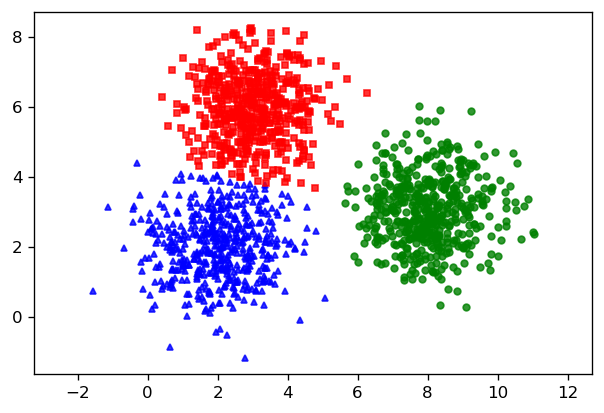

In [7]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [8]:
#K-medois Implementation
#TODO 
class k_medoids:
    def __init__(self, k=2, max_iter = 300, has_converged=False):
    
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
    
    
        self.k = k
        self.max_iter = max_iter
        self.has_converged= has_converged
        
        #storage cost for each cluster
        self.centroids_cost = [0] * (self.k)
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
        
        # create cost list
            
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        

        if(not set([tuple(x) for x in self.centroids]) == set([tuple(x) for x in cur_centroids])):
            self.has_converged = False
            self.centroids = cur_centroids
            
            
                
            
    def Centroid_moving(self, data_point,X):
        new_centroids = []
        for i in range(0, self.k):
            new_centroid = self.centroids[i]
            old_centroids_cost = self.centroids_cost[i]
            for j in range(len(data_point[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_centroids_cost = 0
                for dpoint_index in range(len(data_point[i])):
                    cur_centroids_cost += euclidianDistance(X[j], X[data_point[i][dpoint_index]])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_centroids_cost < old_centroids_cost:
                    new_centroid = X[j]
                    old_centroids_cost = cur_centroids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_centroids.append(new_centroid)
        return new_centroids
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)  
        #Main loop
        for i in range(self.max_iter):  
            #storage data point for each cluster, each element of data point is each index in X
            data_point =  [[] for p in range(self.k)]
            self.centroids_cost= [0] * (self.k)
            for p in range(len(X)):
            # Create list distances between centroids and data sample
                d_list =[]
                for j in range(self.k):

                    # Calculate distances between current data sample and centroid(using euclidian distance) 
                    # Store to d_list
                    #TODO 
                    d_list.append(euclidianDistance(self.centroids[j], X[p]))
                # Store the Cluster has minimal distance between its centroid and current data sample to pred
                self.centroids_cost[d_list.index(min(d_list))] += min(d_list)
                #add point to cluster
                data_point[d_list.index(min(d_list))].append(p) 

            # centroid moving for each cluster
            
            cur_centroids = self.Centroid_moving(data_point,X)
            
            
            self.updateCentroids(cur_centroids)
            if self.has_converged:
                    break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))

                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            
            pred.append( d_list.index(min(d_list)))
        return np.array(pred)

Centers found by your model:
[[8.31431617 3.18247401]
 [2.60844105 6.65476282]
 [2.03126431 2.18192959]]


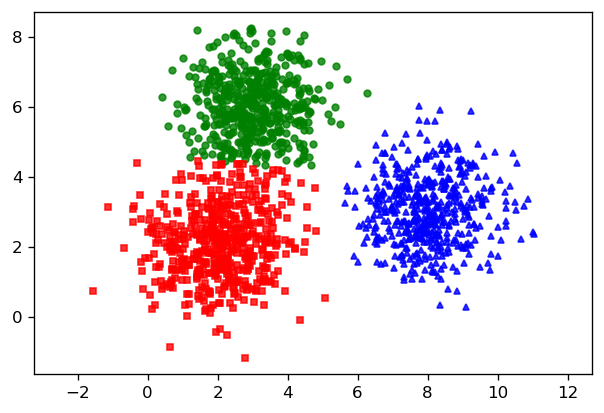

In [9]:
#Test
model1=k_medoids(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


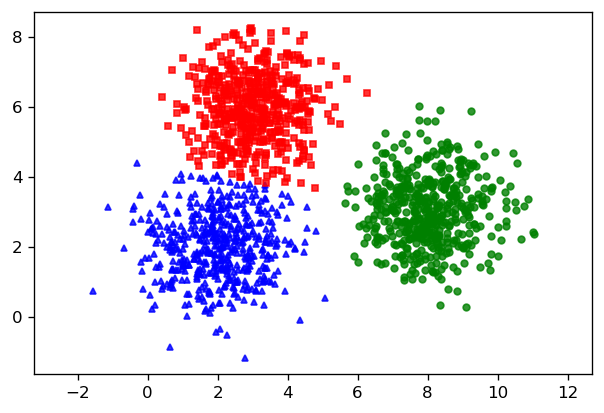

In [10]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO: 
K medoids dùng điểm cụ thể trong bộ dữ liệu, K-means dùng trung bình các điểm trong cụm

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

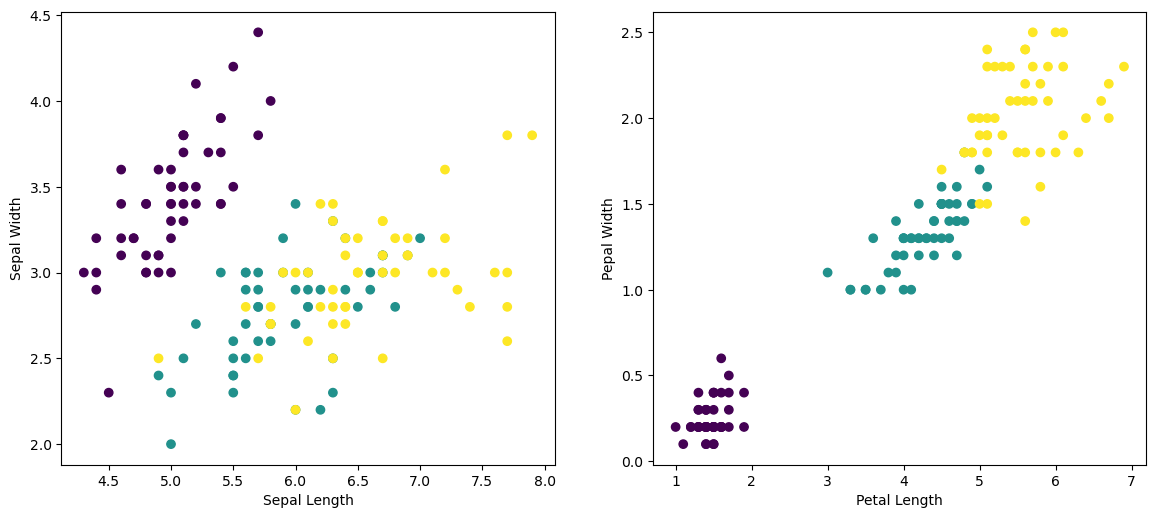

In [13]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO: 
Tập dữ liệu Iris là dữ liệu của 3 loại hoa: 
Dữ liệu bao gồm chiều dài, chiều rộng của đài hoa và cánh hoa

In [14]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.462      0.246     ]]


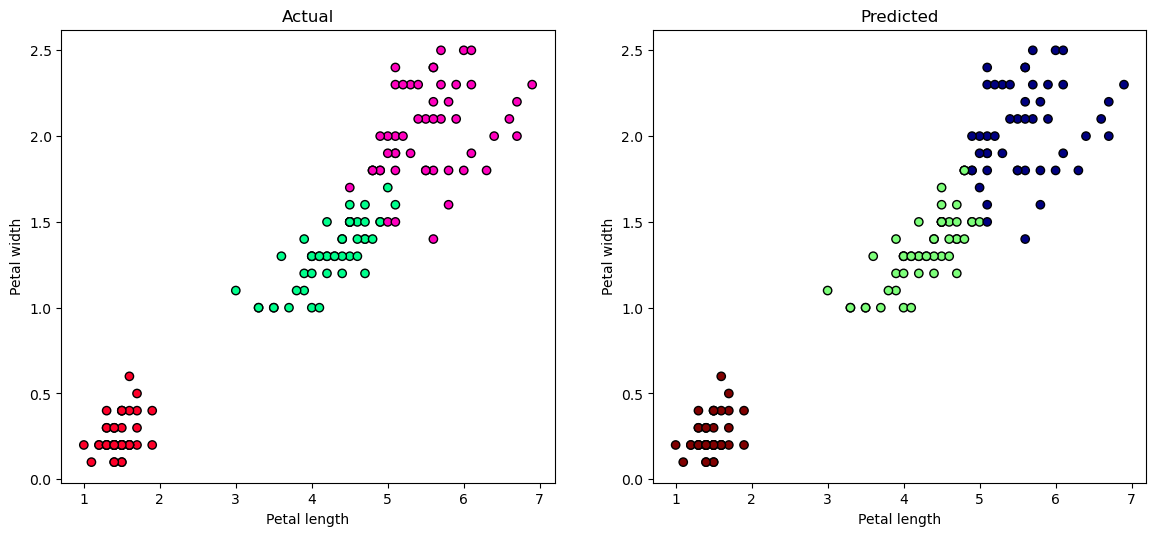

In [15]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted');

**Nhận xét kết quả:**

TODO:
K-Means dự đoán được khá gần với kết quả, những điểm bị sai lệch là những điểm ở biên cụm



### Thực hiện tương tự với thuật toán K-medois

In [16]:
#TODO
D=X[:,2:]
model=k_medoids(k=3)
centers = model.fit(D)
print(centers)

[[4.5 1.5]
 [1.4 0.2]
 [5.6 1.4]]


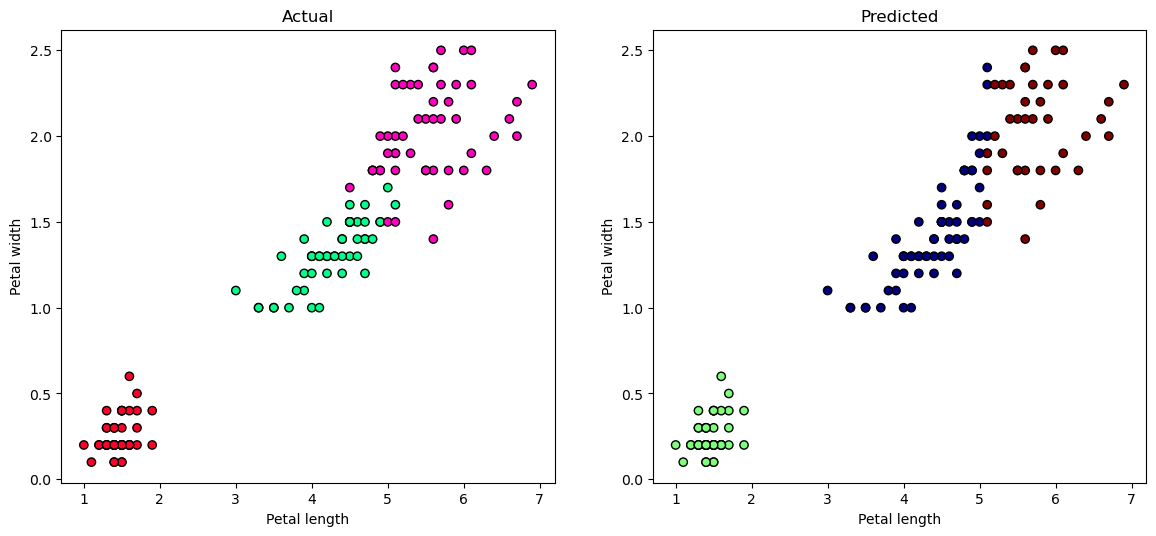

In [17]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted');

K-Medoids dự đoán đúng dữ liệu ở cụm tách rời xa nhau, nhưng tỉ lệ sai cao ở những cụm gần nhau,
và có kết quả của mỗi lần chạy khác nhau, do sự random tâm cụm lúc đầu